OBSERVACIONES GENERALES DE LA REALIZACIÓN DE LA PRUEBA TÉCNICA

La prueba técnica se ha desarrollado en varias etapas:

1. Análisis Exploratorio de Datos (EDA).

En una primera aproximación se han analizado los datos proporcionados en ambos archivos csv, para evaluar la calidad de los datos y tener una visión general de la estructura de los mismos, identificando distribuciones de variables, presencia de nulos y duplicados y posibles valores atípicos u outliers. Este análisis inicial es útil para establecer diagnósticos iniciales de los datos y planificar las acciones de limpieza y tratamiento de datos necesarias. 


2. Eliminación de duplicados y unión de datasets
Una vez realizada la exploración inicial, y detectada la presencia de duplicados en uno de los csv, se ha procedido a su eliminación para evitar trabajar con datos redundantes y asegurar la consistencia de la información proporcionada. Este proceso de eliminación de duplicados es esencial para que no haya sesgos en el análisis de datos que se pretende realizar. 

Posteriormente, con ambos datasets libres de duplicados, se procede a su unión, utilizando para ello la clave común Loyalty Number. De esta manera se trabaja únicamente con un único dataset, combinando los datos de actividad de vuelos con los datos demográficos y de fidelización de clientes. 


3. Visualización inicial complementaria al EDA.
Una vez obtenidos los datos unificados y sin duplicados, se llevan a cabo visualizaciones básicas (histogramas, boxplots y gráficos de barras) que complementan el análisis exploratorio inicial. Estas gráficas permiten confirmar visualmente la distribución de las variables, identificar valores atípicos y proporcionar una base para la definición de estrategias de gestión de nulos.

4. Gestión de valores nulos.
Se definieron estrategias diferenciadas según el tipo de variable y el contexto: imputación mediante estadísticas descriptivas en el caso de variables numéricas, eliminación de registros no representativos cuando la proporción de nulos es alta, y creación de nuevas categorías para aquellos valores faltantes en variables categóricas. Únicamente hay presencia de nulos en uno de los archivos csv.


5. Normalización y estandarización de variables.
Sobre un dataset ya depurado (sin duplicados ni inconsistencias) se han aplicado técnicas de normalización y estandarización de variables allí donde ha sido necesario.


6. Visualizaciones de los datos.
Con el dataset ya consolidado y transformado, se han realizado visualizaciones más complejas, con el objetivo de extraer patrones de comportamientos, detectar segmentos de clientes, facilitar la toma de decisiones estratégicas. 


A continuación se procede al desarrollo de la prueba:

En este primer archivo y para que la sobrecarga excesiva de información no produzca bloqueos de Visual Code, se ha realizado el Análisis Exploratorio de Datos, Eliminación de duplicados y Unión de Datasets.

1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

En primer lugar, vamos a realizar una Análisis Exploratorio de nuestros Datos, EDA, para identificar posibles problemas, como valores atípicos, daltos faltantes, duplicados, presencia de valores nulos, así como estadísticas básicas de las columnas involucradas.

In [25]:
# importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np
from IPython.display import display
import warnings

In [26]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [27]:
# ver todas las filas
pd.set_option('display.max_rows', None)

Guardamos los dos csv en dos dataframes: df_customer_flight y df_customer_loyalty:

In [28]:
# Cargamos los csv

df_customer_flight = pd.read_csv("Customer Flight Activity.csv")

In [29]:
df_customer_loyalty = pd.read_csv("Customer Loyalty History.csv")

Hacemos una primera visualización de los dataframes para asegurarnos de si los índices se visualizan de forma correcta o es necesario añadir algún index_col:

In [30]:
df_customer_flight.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [11]:
df_customer_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


Una vez importadas las librerías necesarias y cargados los csv de forma que podamos ver todas las filas y columnas, se procede a crear la función EDA para posteriormente hacer un breve resumen explicativo de los resultados obtenidos. 

In [31]:
def eda(df):
    """
    Exploratory Data Analysis (EDA) profesional de un DataFrame:
    - Vista general (dimensiones, tipos, info)
    - Primeras y últimas filas
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores nulos y duplicados
    - Valores únicos y distribuciones categóricas
    - Resumen general de columnas
    """
    # --- Dimensiones ---
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]:,} columnas")

    # --- Primeras y últimas filas ---
    print("\nPrimeras 5 filas:")
    display(df.head())
    print("\nÚltimas 5 filas:")
    display(df.tail())

    # --- Información general ---
    print("\nInformación general:")
    df.info()

    # --- Tipos de datos ---
    print("\nTipos de datos por columna:")
    print(df.dtypes.value_counts())
    print("\nDetalle:")
    display(df.dtypes.to_frame("Tipo de dato"))

    # --- Columnas numéricas ---
    num_cols = df.select_dtypes(include="number").columns
    if len(num_cols) > 0:
        print("\nEstadísticas descriptivas (numéricas):")
        display(df[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T)

    # --- Columnas categóricas ---
    cat_cols = df.select_dtypes(include=["object","category"]).columns
    if len(cat_cols) > 0:
        print("\nEstadísticas descriptivas (categóricas):")
        display(df[cat_cols].describe().T)

        print("\nDistribución de variables categóricas (Top 5 valores):")
        for col in cat_cols:
            print(f"\nColumna: {col} (valores únicos: {df[col].nunique()})")
            display(df[col].value_counts(dropna=False).head())

    # --- Valores nulos ---
    print("\nValores nulos por columna:")
    nulos_df = pd.DataFrame({
        "Nulos": df.isnull().sum(),
        "% Nulos": (df.isnull().mean()*100).round(2)
    }).sort_values("% Nulos", ascending=False)
    display(nulos_df)

    # --- Filas duplicadas ---
    print(f"\nFilas duplicadas: {df.duplicated().sum():,}")

    # --- Valores únicos ---
    print("\nValores únicos por columna:")
    display(df.nunique().sort_values(ascending=False).to_frame("Valores únicos"))

    # --- Resumen general ---
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Tipo": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().mean()*100).round(2).values
    })
    print("\nResumen general de columnas:")
    display(resumen)


    return resumen

#### Resultados obtenidos para df_customer_flight:

In [32]:
# EDA para df_customer_flight
print("EDA para df_customer_flight")
resumen_flight = eda(df_customer_flight)

EDA para df_customer_flight
Dimensiones del dataset: 405,624 filas x 10 columnas

Primeras 5 filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0



Últimas 5 filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

Tipos de datos por columna:
int64      9
float64    1
Name: count, dtype: int64

Detalle:


,Tipo de dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,108481.0,144879.0,326961.00,550834.0,772194.00,954750.0,990598.0,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.0,2017.0,2017.00,2017.5,2018.00,2018.0,2018.0,2018.0
Month,405624.0,6.500000,3.452057,1.0,1.0,1.0,3.75,6.5,9.25,12.0,12.0,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.0,0.0,0.00,1.0,8.00,15.0,18.0,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,0.00,0.0,1.00,6.0,9.0,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.0,0.0,0.00,1.0,10.00,18.0,24.0,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.0,0.0,0.00,488.0,2336.00,3920.0,4849.0,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.0,0.0,0.00,50.0,239.00,402.0,494.0,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.00,0.0,0.00,389.0,638.0,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.00,0.0,0.00,32.0,52.0,71.0



Valores nulos por columna:


,Nulos,% Nulos
Loyalty Number,0,0.0
Year,0,0.0
Month,0,0.0
Flights Booked,0,0.0
Flights with Companions,0,0.0
Total Flights,0,0.0
Distance,0,0.0
Points Accumulated,0,0.0
Points Redeemed,0,0.0
Dollar Cost Points Redeemed,0,0.0



Filas duplicadas: 1,864

Valores únicos por columna:


,Valores únicos
Loyalty Number,16737
Distance,4746
Points Accumulated,1549
Points Redeemed,587
Dollar Cost Points Redeemed,49
Total Flights,33
Flights Booked,22
Flights with Companions,12
Month,12
Year,2



Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Loyalty Number,Loyalty Number,int64,16737,0.0
Year,Year,int64,2,0.0
Month,Month,int64,12,0.0
Flights Booked,Flights Booked,int64,22,0.0
Flights with Companions,Flights with Companions,int64,12,0.0
Total Flights,Total Flights,int64,33,0.0
Distance,Distance,int64,4746,0.0
Points Accumulated,Points Accumulated,float64,1549,0.0
Points Redeemed,Points Redeemed,int64,587,0.0
Dollar Cost Points Redeemed,Dollar Cost Points Redeemed,int64,49,0.0


Resumen explicativo del EDA obtenido:

- Dataset de 405.624 filas × 10 columnas.

- Todas las variables son numéricas, en concreto, 9 enteras y 1 de tipo float.

- No presenta valores nulos.

- El número de duplicados se eleva a 1.864 filas.

- A rasgos generales, muestra la actividad de los clientes en 2 años, donde la mayor parte de ellos viajan poco y redimen pocos puntos.

- En cuanto a los años, los datos se corresponden a los años 2017 y 2018. 

- En la actividad de vuelos, se obtiene un promedio de vuelos reservados de  ~4.1 y de vuelos totales ~5.1. La mayor parte de los clientes reservan pocos vuelos, como bien puede deducirse de su mediana de valor 1. La distancia media volada es aproximadamente  ~1.209 km.


- Con respecto a los puntos, el promedio acumulado es de ~124, con fuerte dispersión. Redención de puntos mucho más baja (media 31, mediana 0).
Costo en dólares de redención también bajo (media ≈ 2.5, mediana 0).

¿¿¿????

Cardinalidad:

Loyalty Number: 16,737 clientes únicos.

Alta variabilidad en Distance (4,746 valores distintos).

Pocas categorías en columnas de conteo (p.ej. Flights Booked = 22 valores distintos).


📊 Customer Flight Activity

Tamaño: 405,624 registros × 10 columnas.

Datos: 100% completos (sin nulos).

Duplicados: 1,864 filas.

Variables: todas numéricas (9 enteras, 1 float).

Periodo: solo 2017–2018.

Actividad:

Los clientes reservan en promedio 4 vuelos al mes, pero la mediana es solo 1 → muchos clientes vuelan poco.

Distancia media recorrida ~1,200 km, con mucha dispersión.

Puntos acumulados promedio ~124, pero redención es baja (mediana = 0).

El gasto en redención en dólares es prácticamente nulo para la mayoría.

Clientes: 16,737 identificadores únicos.

Conclusión: dataset grande, consistente y sin nulos; describe la actividad de vuelo de clientes en 2 años. La mayoría tiene baja actividad y redime pocos puntos.



#### Resultados obtenidos para df_customer_loyalty:


In [33]:
# EDA para df_customer_loyalty
print("EDA para df_customer_loyalty")
resumen_loyalty = eda(df_customer_loyalty)

EDA para df_customer_loyalty
Dimensiones del dataset: 16,737 filas x 16 columnas

Primeras 5 filas:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



Últimas 5 filas:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-nu

,Tipo de dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,108562.9200,144924.600,326603.00,550434.00,772019.00,954474.800,990681.2000,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,40260.0000,48443.600,59246.50,73455.00,88517.50,123841.000,250253.0000,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,2230.4528,2475.514,3980.84,5780.18,8940.58,22031.692,35928.6432,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2012.0000,2012.000,2014.00,2015.00,2017.00,2018.000,2018.0000,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,1.0000,1.000,4.00,7.00,10.00,12.000,12.0000,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2013.0000,2014.000,2016.00,2017.00,2018.00,2018.000,2018.0000,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,1.0000,1.000,4.00,7.00,10.00,12.000,12.0000,12.00



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766



Distribución de variables categóricas (Top 5 valores):

Columna: Country (valores únicos: 1)


Country
Canada    16737
Name: count, dtype: int64


Columna: Province (valores únicos: 11)


Province
Ontario             5404
British Columbia    4409
Quebec              3300
Alberta              969
Manitoba             658
Name: count, dtype: int64


Columna: City (valores únicos: 29)


City
Toronto      3351
Vancouver    2582
Montreal     2059
Winnipeg      658
Whistler      582
Name: count, dtype: int64


Columna: Postal Code (valores únicos: 55)


Postal Code
V6E 3D9    911
V5R 1W3    684
V6T 1Y8    582
V6E 3Z3    544
M2M 7K8    534
Name: count, dtype: int64


Columna: Gender (valores únicos: 2)


Gender
Female    8410
Male      8327
Name: count, dtype: int64


Columna: Education (valores únicos: 5)


Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64


Columna: Marital Status (valores únicos: 3)


Marital Status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64


Columna: Loyalty Card (valores únicos: 3)


Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64


Columna: Enrollment Type (valores únicos: 2)


Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64


Valores nulos por columna:


,Nulos,% Nulos
Cancellation Month,14670,87.65
Cancellation Year,14670,87.65
Salary,4238,25.32
Loyalty Number,0,0.00
City,0,0.00
Postal Code,0,0.00
Province,0,0.00
Country,0,0.00
Education,0,0.00
Gender,0,0.00



Filas duplicadas: 0

Valores únicos por columna:


,Valores únicos
Loyalty Number,16737
CLV,7984
Salary,5890
Postal Code,55
City,29
Enrollment Month,12
Cancellation Month,12
Province,11
Enrollment Year,7
Cancellation Year,6



Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Loyalty Number,Loyalty Number,int64,16737,0.00
Country,Country,object,1,0.00
Province,Province,object,11,0.00
City,City,object,29,0.00
Postal Code,Postal Code,object,55,0.00
Gender,Gender,object,2,0.00
Education,Education,object,5,0.00
Salary,Salary,float64,5890,25.32
Marital Status,Marital Status,object,3,0.00
Loyalty Card,Loyalty Card,object,3,0.00


El dataset dispone de  16,737 registros × 16 columnas (1 fila por cliente).

- Presenta variables categóricas y numéricas.

- No presenta duplicados.

- Presenta nulos en las variables Salary (25,32 % de nulos) y en las variables Cancellation Year (87,65% de nulos) y Cancellation Month (87,65% de nulos).

- Conclusión: dataset de clientes leales, con buena calidad salvo en salario y cancelaciones (esperado). Aporta la dimensión demográfica y de valor de cliente.


 VER QUÉ PONGO DE TODO ÉSTO
 
Demografía:

Todos clientes en Canadá (11 provincias, 29 ciudades).

Género equilibrado (≈50% hombres y mujeres).

Educación: principalmente Bachelor (62%), seguido de College.

Estado civil: mayoría casados (58%).

Negocio:

Tarjetas: Star (46%), Nova (34%), Aurora (20%).

Tipo de enrolamiento: casi todos Standard, con pequeña cohorte 2018 Promotion.

CLV (Customer Lifetime Value) promedio ~8,000, con gran variabilidad.

Año de enrolamiento entre 2012 y 2018.

Cancelaciones registradas en ~12% de clientes.



#### 2. ELIMINACIÓN DE DUPLICADOS

In [34]:
def eliminar_duplicados(df, subset=None, keep="first", inplace=False):
    """
    Elimina duplicados de un DataFrame y muestra un log con el resultado.
    
    Parámetros:
    -----------
    df : pd.DataFrame
        Dataset al que se eliminarán duplicados.
    subset : str, list, opcional
        Columnas a considerar para detectar duplicados. 
        Por defecto None → considera todas las columnas.
    keep : {"first", "last", False}, por defecto "first"
        - "first": mantiene la primera ocurrencia y elimina las demás.
        - "last": mantiene la última ocurrencia.
        - False: elimina todas las ocurrencias duplicadas.
    inplace : bool, por defecto False
        - True: modifica el DataFrame original.
        - False: devuelve una copia limpia.
    
    Retorna:
    --------
    pd.DataFrame
        DataFrame sin duplicados (si inplace=False).
    """
    # Número de filas antes
    n_antes = len(df)
    
    # Eliminar duplicados
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
        n_despues = len(df)
        print(f"🔎 Duplicados eliminados: {n_antes - n_despues:,}. Filas finales: {n_despues:,}. (keep='{keep}')")
        return df
    else:
        df_sin = df.drop_duplicates(subset=subset, keep=keep)
        n_despues = len(df_sin)
        print(f"🔎 Duplicados eliminados: {n_antes - n_despues:,}. Filas finales: {n_despues:,}. (keep='{keep}')")
        return df_sin

In [39]:
# 1. Eliminar duplicados de todo el dataset (considerando todas las columnas)
df_customer_flight_no_dups = eliminar_duplicados(df_customer_flight)

🔎 Duplicados eliminados: 1,864. Filas finales: 403,760. (keep='first')


Ahora procedemos a unir los datasets.

In [41]:
def unir_datasets(df_customer_loyalty, df_customer_flight_no_dups):
    """
    Une los datasets de historial de clientes y actividad de vuelos
    usando la clave 'Loyalty Number'. 
    
    Pasos:
    1. Asegura que la clave sea tipo int en ambos datasets.
    2. Define 'Loyalty Number' como índice en df_customer_loyalty (clave única).
    3. Realiza la unión con join (más eficiente para many-to-one).
    4. Elimina duplicados por seguridad.
    
    Retorna:
    --------
    pd.DataFrame : Dataset consolidado con actividad + perfil de cliente.
    """
    # 1. Asegurar mismo tipo en la clave
    df_customer_flight_no_dups["Loyalty Number"] = df_customer_flight_no_dups["Loyalty Number"].astype(int)
    df_customer_loyalty["Loyalty Number"] = df_customer_loyalty["Loyalty Number"].astype(int)

    # 2. Usar índice único en df_customer_loyalty
    df_customer_loyalty_indexed = df_customer_loyalty.set_index("Loyalty Number")

    # 3. Unión eficiente con join
    df_final = df_customer_flight_no_dups.join(df_customer_loyalty_indexed, on="Loyalty Number", how="inner")

    # 4. Eliminar duplicados (por seguridad)
    filas_antes = len(df_final)
    df_final = df_final.drop_duplicates()
    filas_despues = len(df_final)
    duplicados_eliminados = filas_antes - filas_despues

    print("🔗 Unión completada correctamente")
    print(f"   - Filas iniciales tras la unión: {filas_antes:,}")
    print(f"   - Filas finales tras eliminar duplicados: {filas_despues:,}")
    print(f"   - Duplicados eliminados: {duplicados_eliminados:,}")

    return df_final

In [43]:
df_final = unir_datasets(df_customer_loyalty, df_customer_flight_no_dups)

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\4287570792.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_flight_no_dups["Loyalty Number"] = df_customer_flight_no_dups["Loyalty Number"].astype(int)


🔗 Unión completada correctamente
   - Filas iniciales tras la unión: 403,760
   - Filas finales tras eliminar duplicados: 403,760
   - Duplicados eliminados: 0


In [44]:
df_final.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [46]:
df_final.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficas_complementarias(df):
    """
    Genera histogramas y boxplots para columnas numéricas
    y gráficos de barras para columnas categóricas de un DataFrame.
    """

    # Estilo profesional
    sns.set_theme(style="whitegrid")
    plt.rcParams["figure.figsize"] = (8,5)

    # Columnas numéricas
    num_cols = df.select_dtypes(include="number").columns
    for col in num_cols:
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True, bins=30, color="steelblue", edgecolor="black")
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()

        plt.figure()
        sns.boxplot(x=df[col], color="lightcoral")
        plt.title(f"Boxplot de {col}")
        plt.xlabel(col)
        plt.show()

    # Columnas categóricas
    cat_cols = df.select_dtypes(include=["object","category"]).columns
    for col in cat_cols:
        plt.figure(figsize=(10,5))
        order = df[col].value_counts().index[:20]  # máximo top 20 para no saturar
        ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")
        plt.title(f"Distribución de {col}")
        plt.xticks(rotation=45)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height),
                        ha='center', va='bottom', fontsize=9, color="black")
        plt.show()

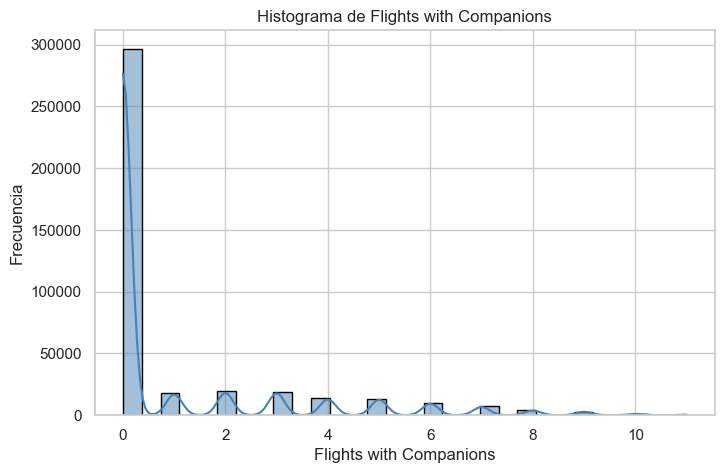

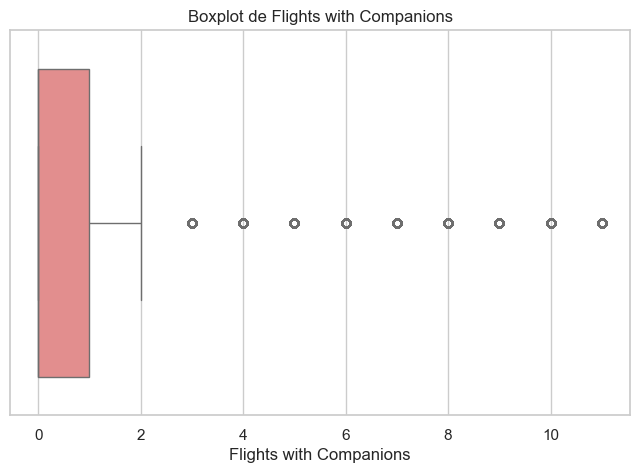

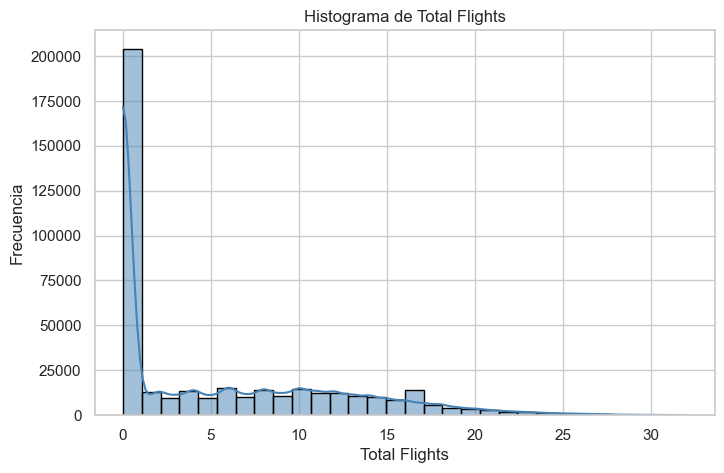

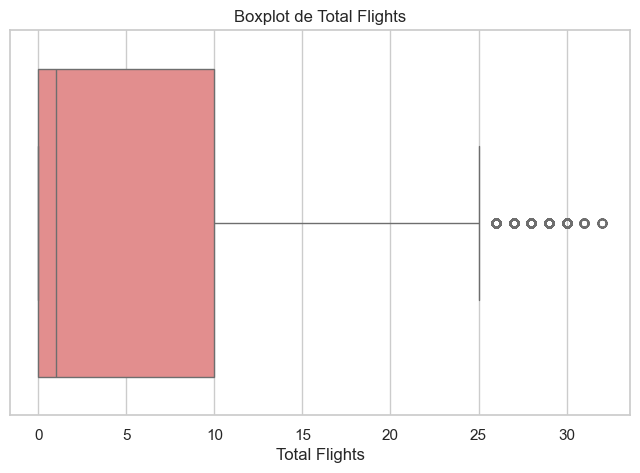

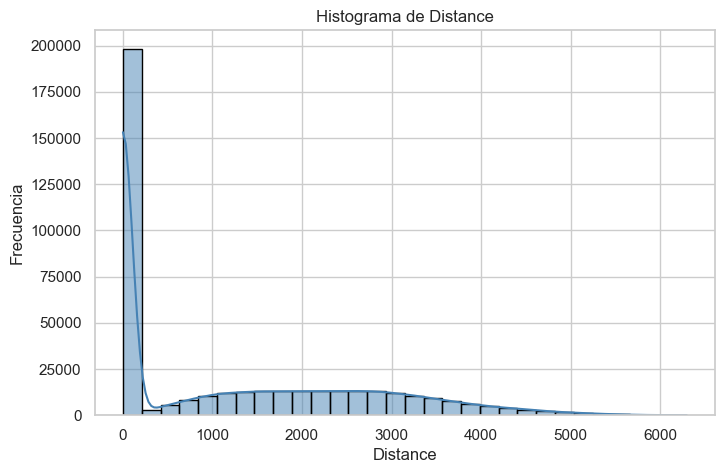

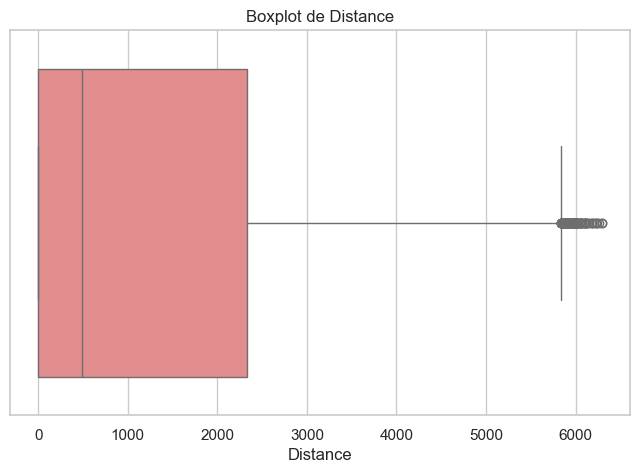

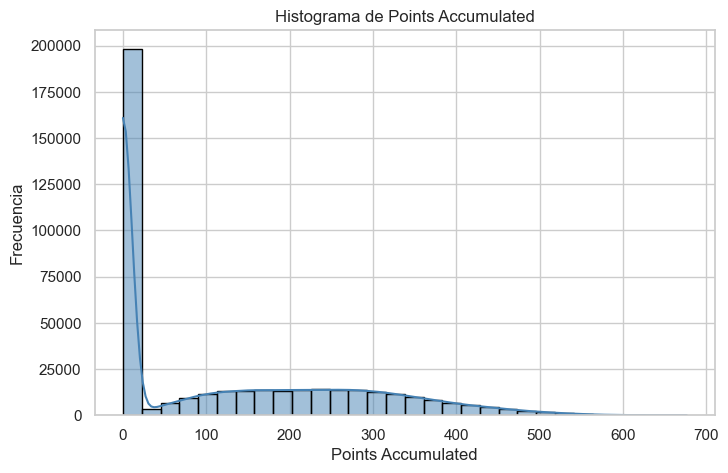

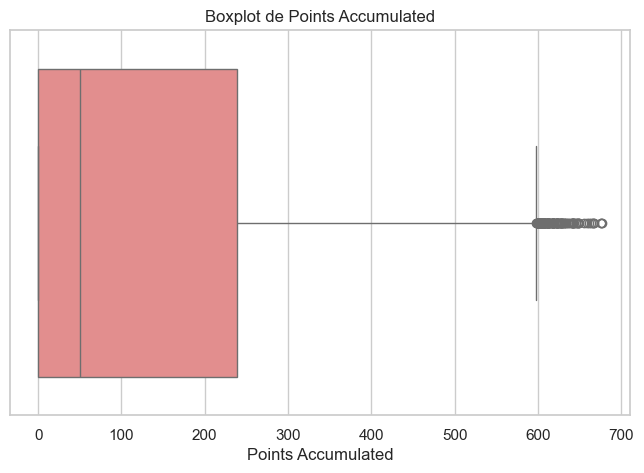

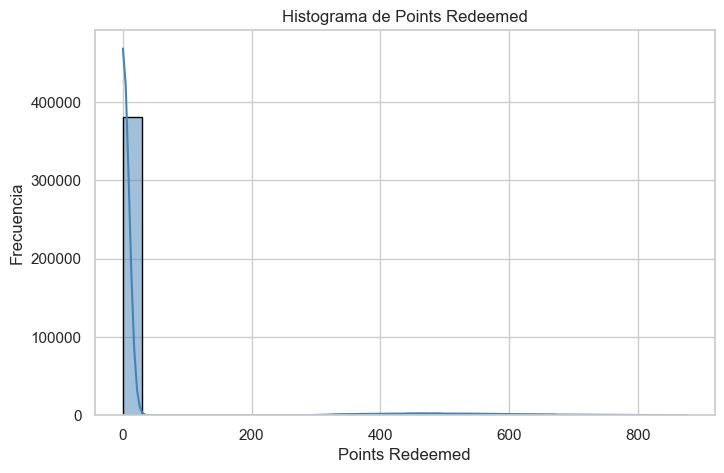

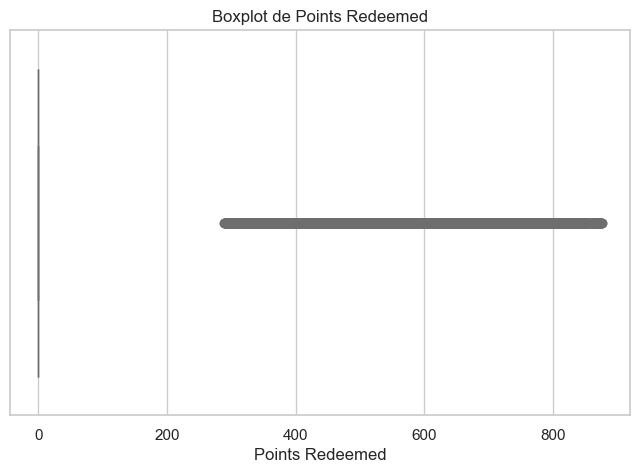

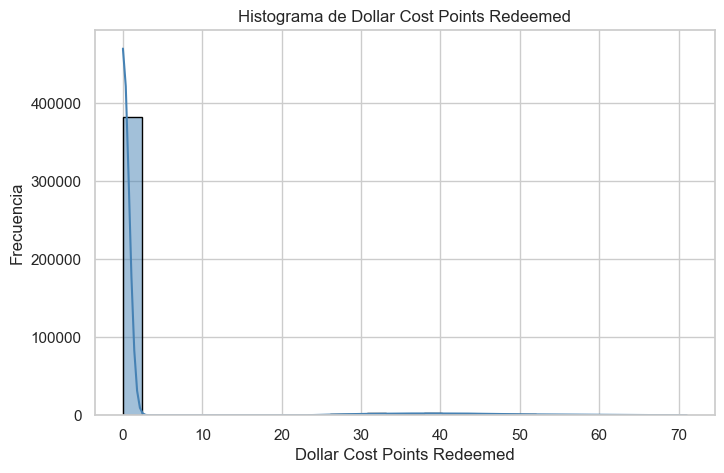

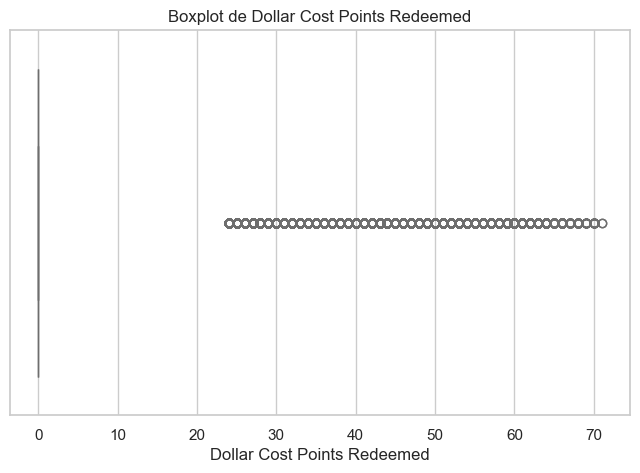

In [36]:
# Para tu dataset de vuelos
graficas_complementarias(df_customer_flight)



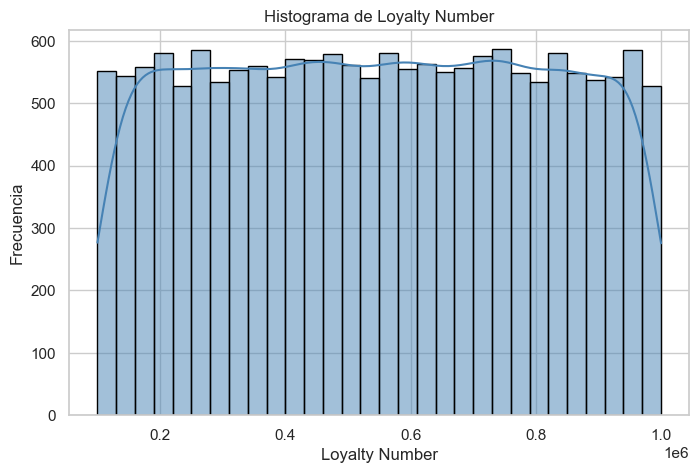

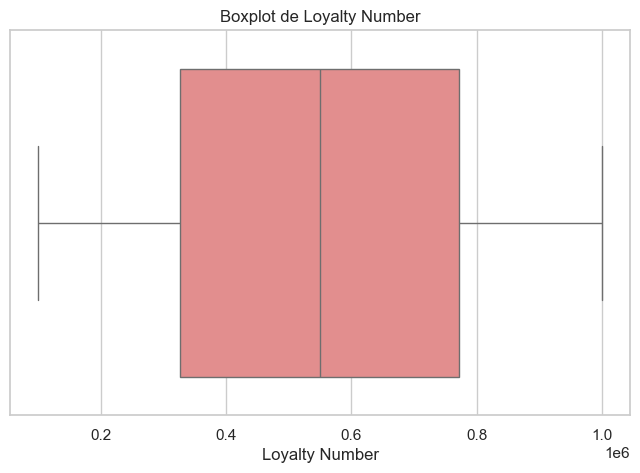

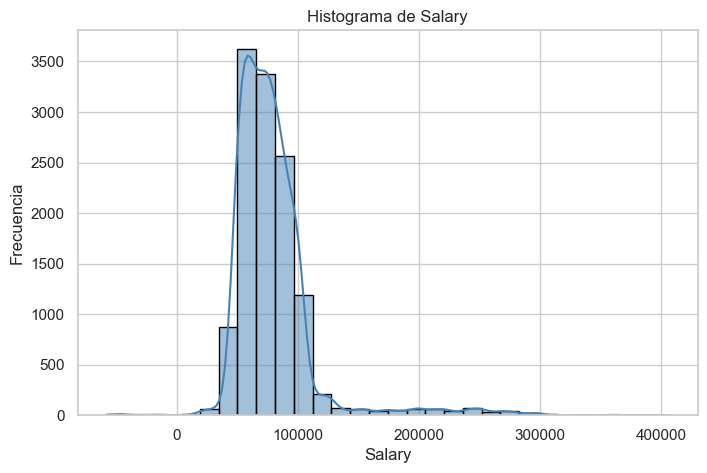

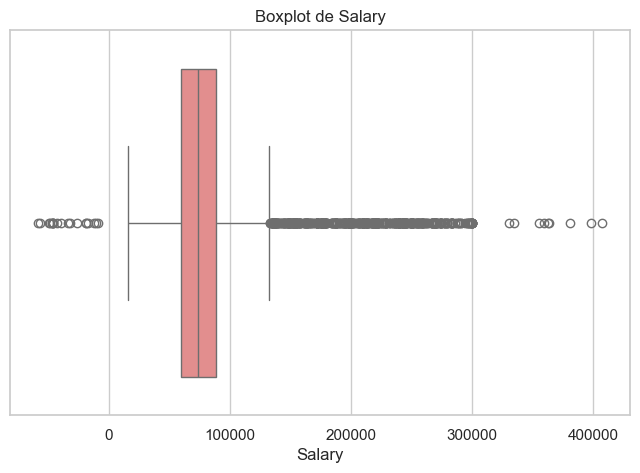

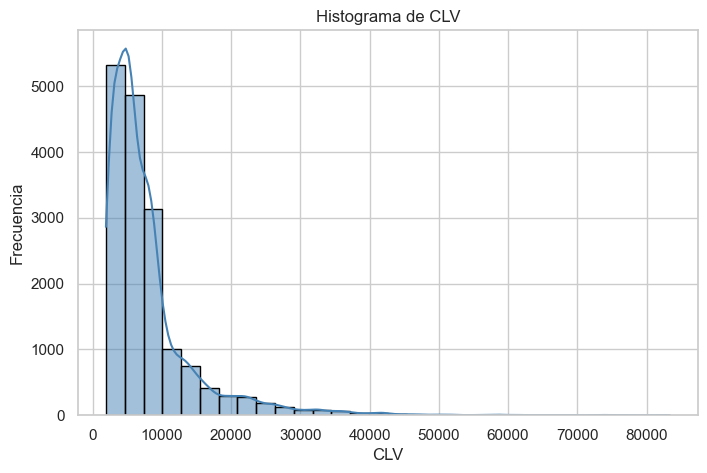

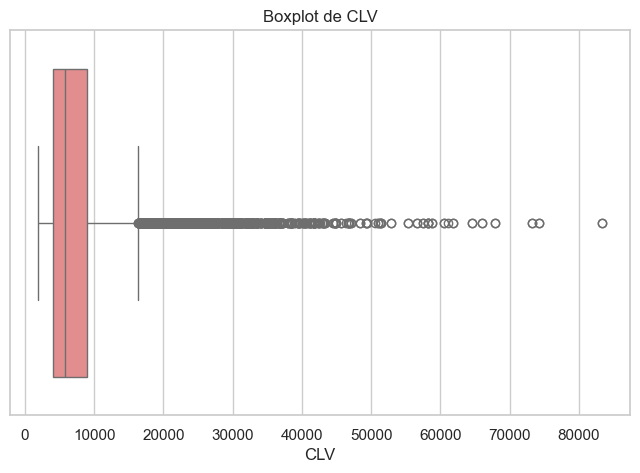

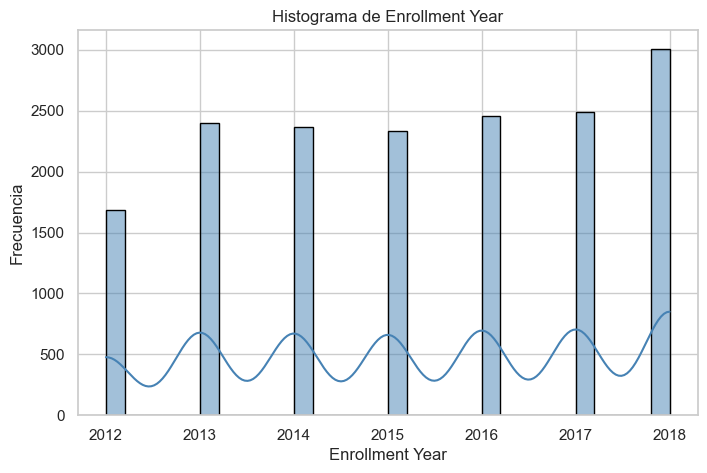

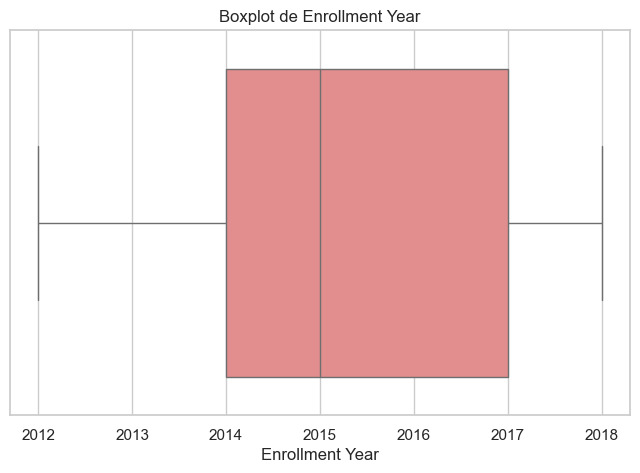

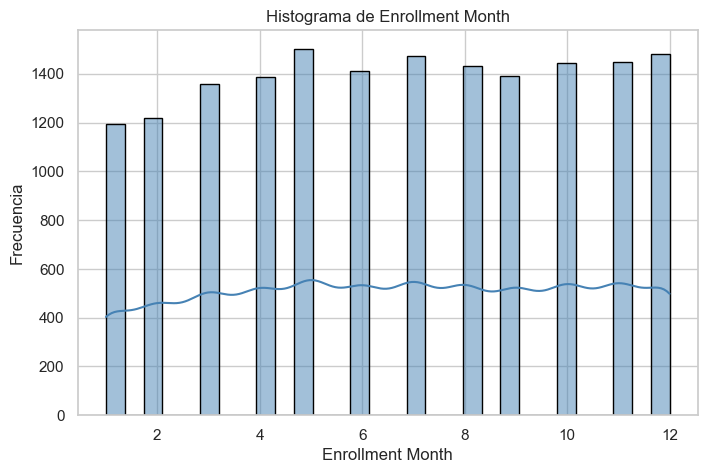

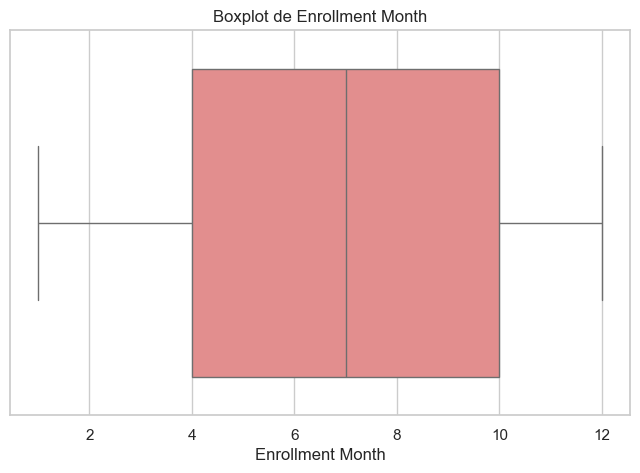

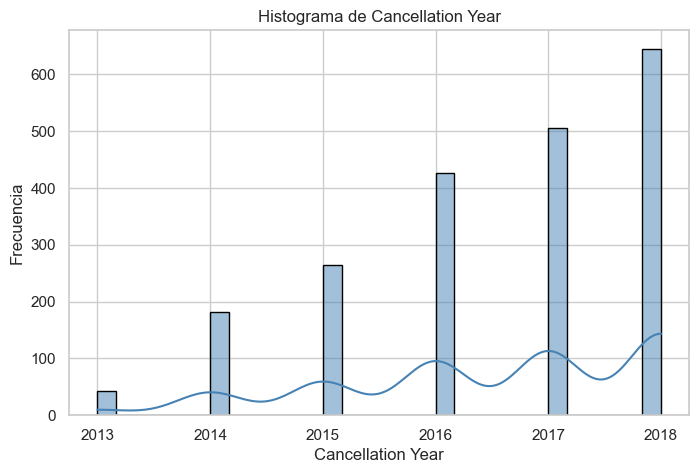

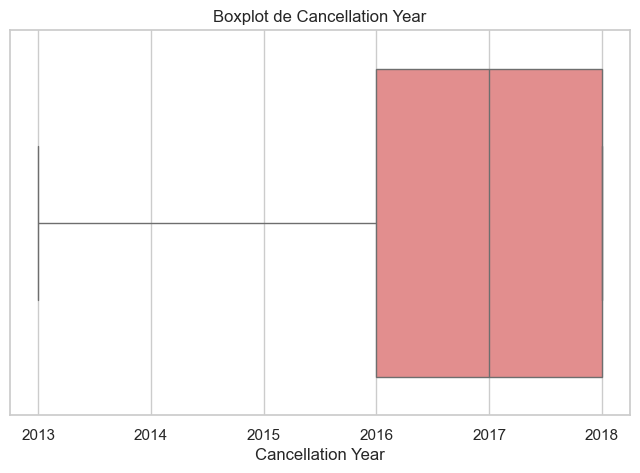

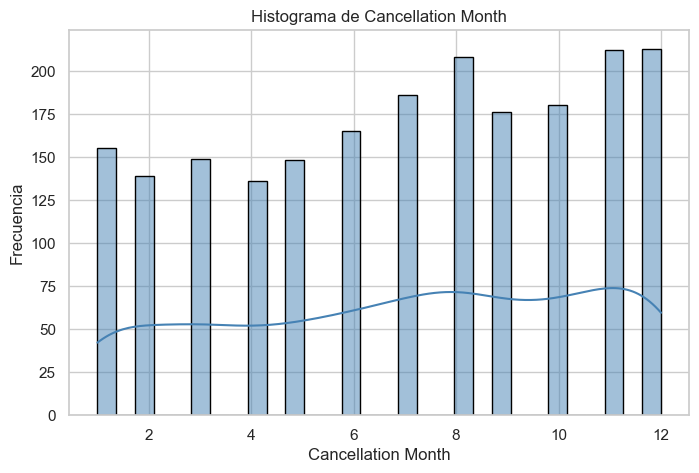

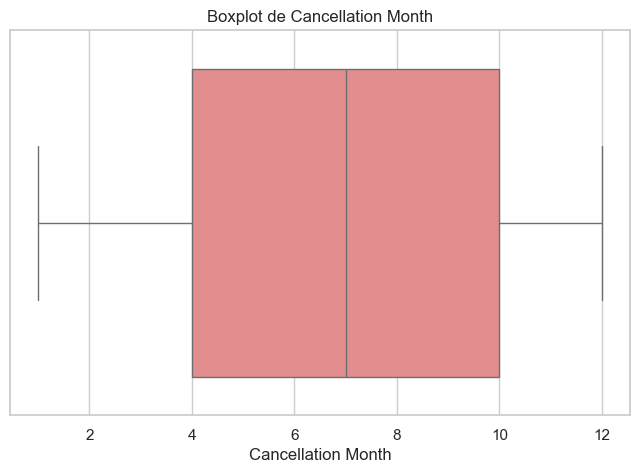

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


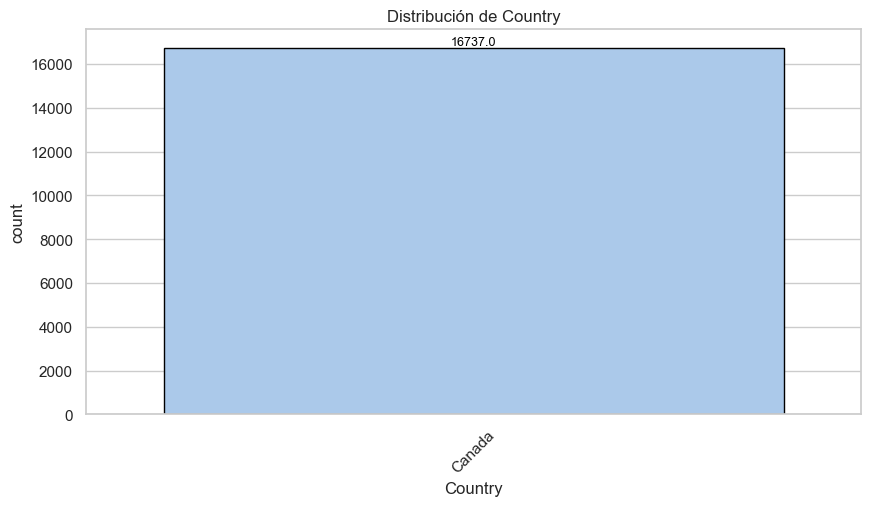

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


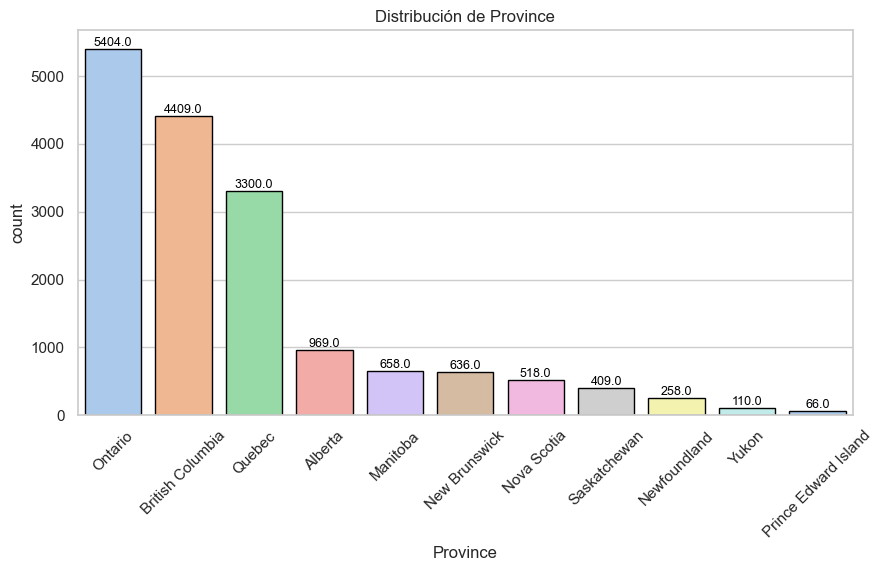

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


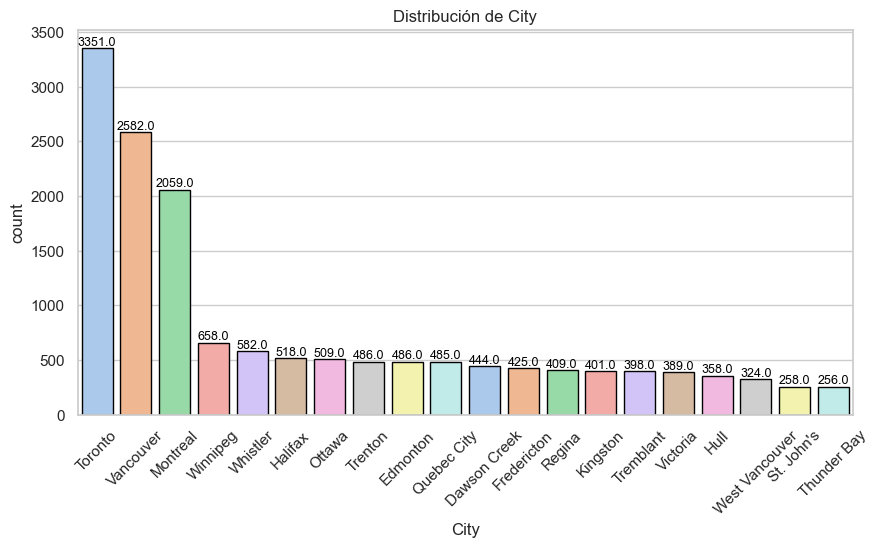

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


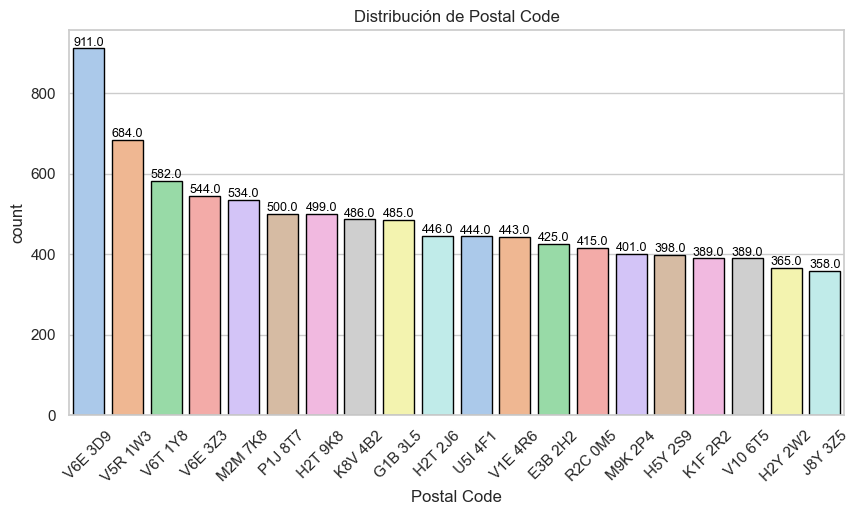

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


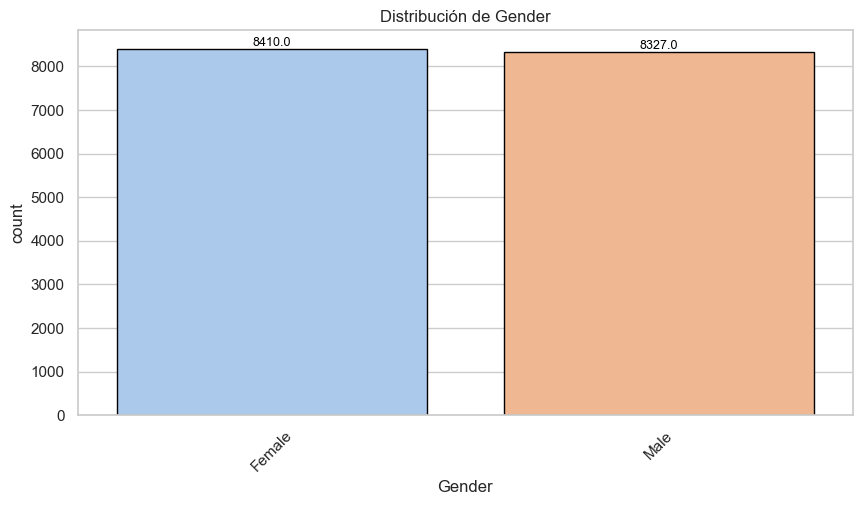

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


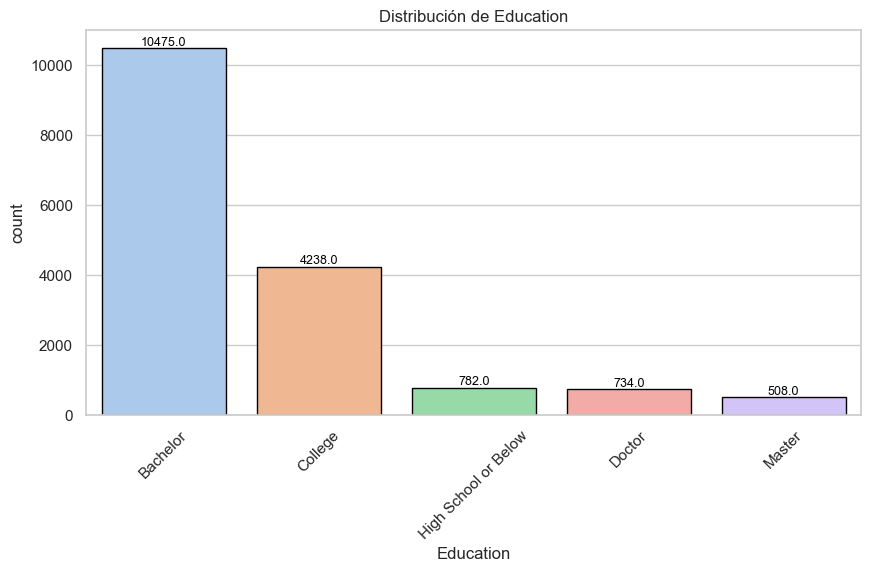

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


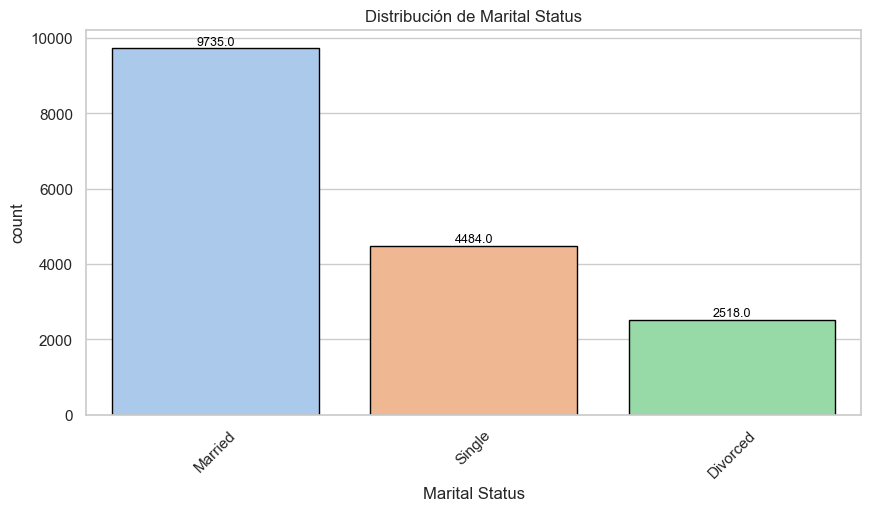

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


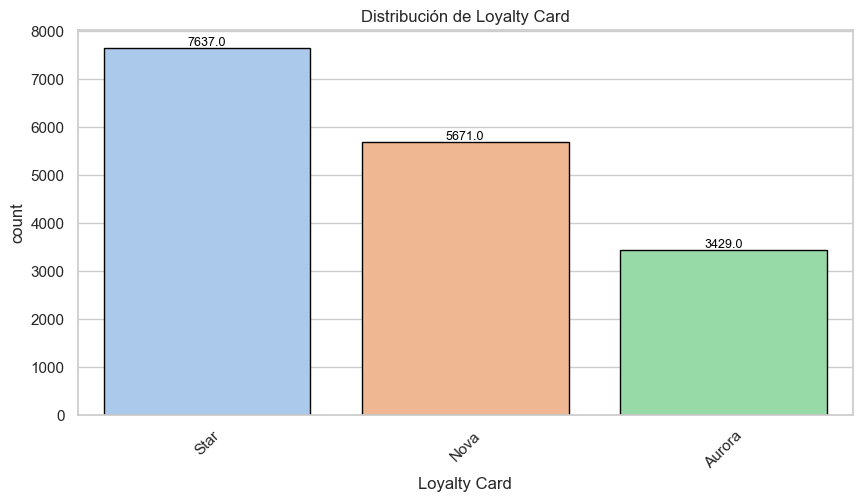

C:\Users\apdue\AppData\Local\Temp\ipykernel_19796\762789587.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, order=order, palette="pastel", edgecolor="black")


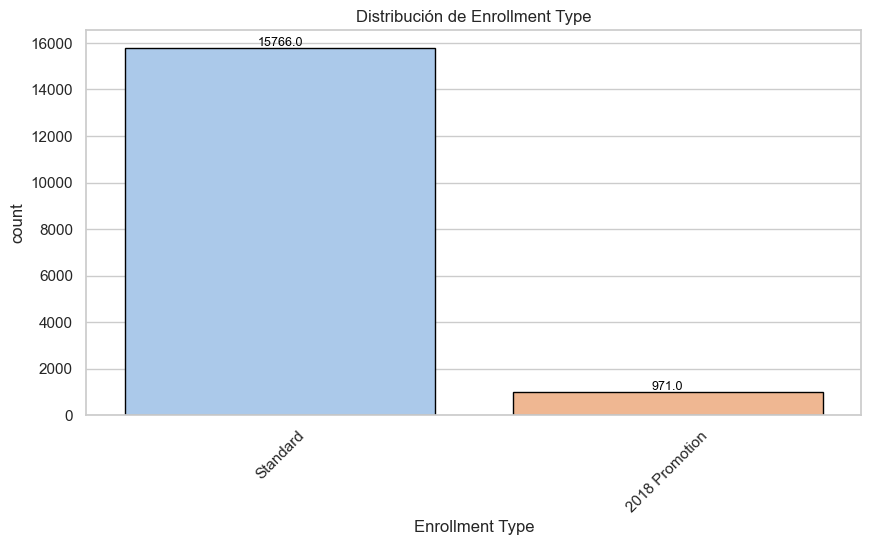

In [24]:
# Para tu dataset de clientes
graficas_complementarias(df_customer_loyalty)